![life](life.jpg)

You are a data analyst for a United Nations initiative focused on understanding global health trends. Your latest assignment is to explore and visualize life expectancy data from around the world, focusing on gender differences. 

Life expectancy can vary significantly over time and across different countries due to numerous factors, including advancements in medicine, a country's development level, and the impacts of conflicts. Interestingly, data consistently shows that women tend to live longer than men, raising intriguing questions. Could this be due to biological factors or perhaps because women generally care for their health better?

Your task is to explore these patterns and disparities. 

### The Data

The dataset contains information about life expectancy in various countries or areas, broken down by gender and time periods. The data is sourced from the _United Nations Population Division, Gender Statistics, Life Expectancy at Birth_.

#### UNdata.csv

| Column            | Meaning                                                                                        |
| ----------------- | ---------------------------------------------------------------------------------------------- |
| `Country.or.Area` | The name of the country or region being described.                                              |
| `Subgroup`        | The specific subgroup within the country or area (e.g., Female, Male).                          |
| `Year`            | The time period for the data provided (e.g., 2000-2005).                                        |
| `Source`          | The source of the data, specifying the UN publication or report where the data originated.      |
| `Unit`            | The unit of measurement for life expectancy.                  |
| `Value`           | The measured value for the life expectancy in the specified country, subgroup, and time period. |
| `Value.Footnotes` | Additional notes or comments related to the value, if any.                                      |


In [1]:
library(dplyr)
library(tidyr)
library(ggplot2)

life_expectancy=read.csv("datasets/UNdata.csv")
head(life_expectancy)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




,Country.or.Area,Subgroup,Year,Source,Unit,Value,Value.Footnotes
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>
1,Afghanistan,Female,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
2,Afghanistan,Female,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
3,Afghanistan,Female,1990-1995,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
4,Afghanistan,Female,1985-1990,UNPD_World Population Prospects_2006 (International estimate),Years,41,NA
5,Afghanistan,Male,2000-2005,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA
6,Afghanistan,Male,1995-2000,UNPD_World Population Prospects_2006 (International estimate),Years,42,NA



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




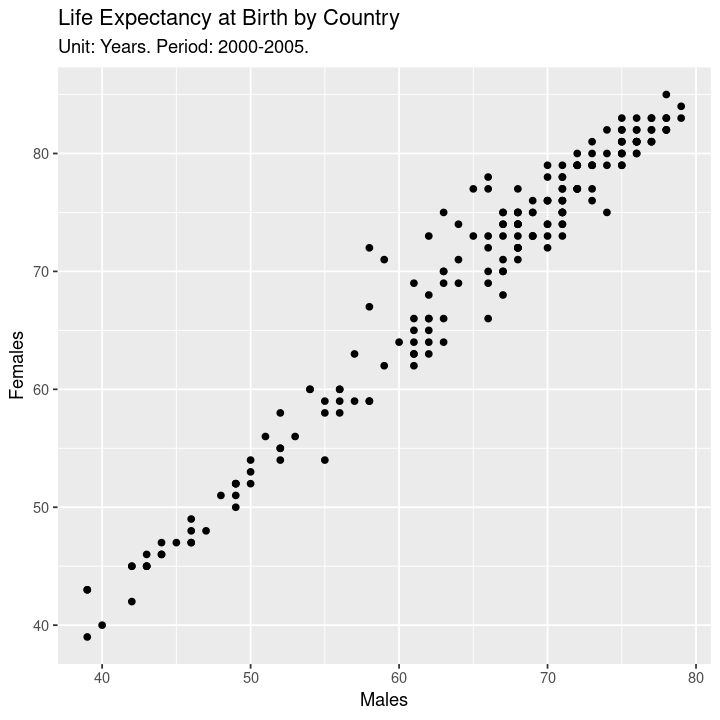

In [1]:
# Set plot size for better visualization
options(repr.plot.width = 6, repr.plot.height = 6)

# Load required packages
library(dplyr)
library(tidyr)
library(ggplot2)

# Load the life expectancy dataset
life_expectancy <- read.csv("datasets/UNdata.csv")

# Question 1: Are there any missing data in the countries column?

filtered_rows <- life_expectancy %>%
  filter(is.na(Value))

missing <- FALSE

# Question 2: How does life expectancy differ between men and women across countries?

# Subset the data for the period 2000-2005
subdata <- life_expectancy %>%
  filter(Year == "2000-2005") %>%
  select(Country.or.Area, Subgroup, Value)

# Subset and find data for male subgroup
subdata_male <- subdata %>%
  filter(Subgroup == "Male") %>%
  select(Country.or.Area, Value) %>%
  rename(Male = Value)

# Subset and find data for female subgroup
subdata_female <- subdata %>%
  filter(Subgroup == "Female") %>%
  select(Country.or.Area, Value) %>%
  rename(Female = Value)

# Merge the male and female data frames
subdata_male_female <- merge(subdata_male, subdata_female, by = "Country.or.Area")

# Plot male and female life expectancy
ggplot(subdata_male_female, aes(x = Male, y = Female)) +
  geom_point() +
  labs(
    title = "Life Expectancy at Birth by Country",
    subtitle = "Unit: Years. Period: 2000-2005.",
    x = "Males",
    y = "Females"
  )

subgroup <- "Female"

# Question 3: Which countries exhibit the largest disparities in life expectancy between genders?

# Identify countries with the largest gender disparities
subdata_male_female <- subdata_male_female %>%
  mutate(Disparity = abs(Male - Female))

# Save top 3 countries with the largest male-female disparities
disparities <- subdata_male_female %>%
  arrange(desc(Disparity)) %>%
  head(3) %>%
  select(Country.or.Area) %>%
  .[[1]]